<a href="https://colab.research.google.com/github/910862KUMAR/car-sales-analysis-powerbi/blob/main/Heart_Disease_Prediction_project_18_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML models & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Save model
import joblib


In [3]:
# Load dataset
df = pd.read_csv("/content/heart.csv")  # upload CSV to Colab first
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
#Data Preprocessing
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Basic info about dataset
print("\nDataset Info:")
print(df.info())

# Check class distribution
print("\nTarget column value counts:")
print(df['target'].value_counts())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13

In [5]:
# Step 4: Split features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Train-test split (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (820, 13)
Testing set shape: (205, 13)


In [6]:
#Train Random Forest Model
# Step 5: Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create model
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate performance
acc = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy:", round(acc * 100, 2), "%")

# Confusion matrix and report
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Model Accuracy: 98.54 %

Confusion Matrix:
 [[102   0]
 [  3 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



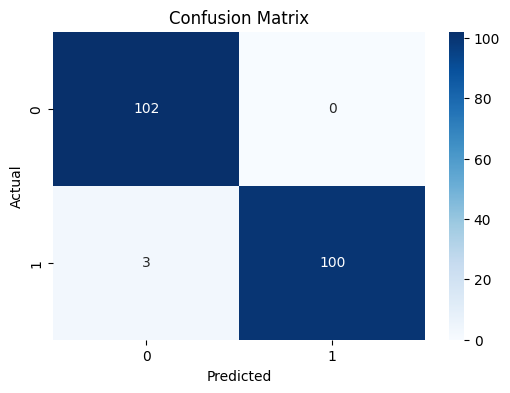

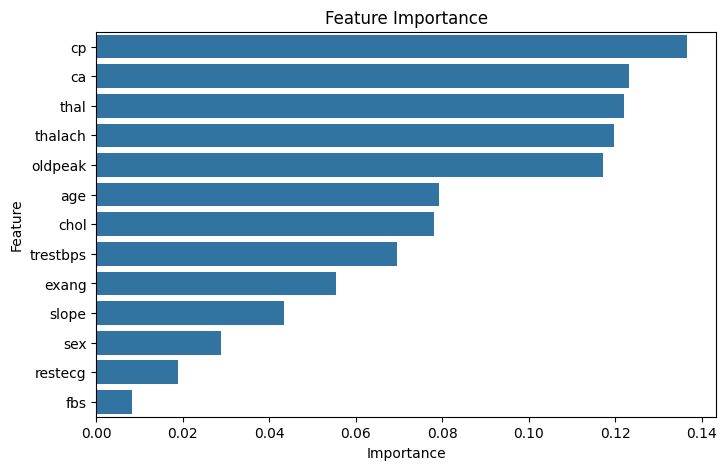

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance (Random Forest)
importances = rf.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance")
plt.show()

In [8]:
import joblib

# Save Random Forest model
joblib.dump(rf, 'heart_model.pkl')

# Save scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)  # fit on full dataset for later use
joblib.dump(scaler, 'heart_scaler.pkl')

print("✅ Model and scaler saved successfully!")

✅ Model and scaler saved successfully!


In [9]:
# run in a Colab cell (after joblib.dump)
from google.colab import files
files.download('heart_model.pkl')
files.download('heart_scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
from google.colab import files
files.download('heart_model.pkl')
files.download('heart_scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

# Load model and scaler
model = joblib.load('heart_model.pkl')
scaler = joblib.load('heart_scaler.pkl')

st.title("Heart Disease Prediction App")
st.write("Enter patient details to predict heart disease")

# Input fields
age = st.number_input("Age", min_value=1, max_value=120, value=45)
sex = st.selectbox("Sex", ["Male", "Female"])
cp = st.number_input("Chest Pain Type (0–3)", min_value=0, max_value=3, value=1)
trestbps = st.number_input("Resting Blood Pressure", min_value=80, max_value=200, value=120)
chol = st.number_input("Cholesterol", min_value=100, max_value=600, value=200)
fbs = st.selectbox("Fasting Blood Sugar >120 mg/dl", ["Yes", "No"])
restecg = st.number_input("Resting ECG (0–2)", min_value=0, max_value=2, value=1)
thalach = st.number_input("Max Heart Rate Achieved", min_value=60, max_value=220, value=150)
exang = st.selectbox("Exercise Induced Angina", ["Yes", "No"])
oldpeak = st.number_input("ST Depression", min_value=0.0, max_value=10.0, value=1.0)
slope = st.number_input("Slope of ST Segment (0–2)", min_value=0, max_value=2, value=1)
ca = st.number_input("Number of Major Vessels (0–3)", min_value=0, max_value=3, value=0)
thal = st.number_input("Thalassemia (1–3)", min_value=1, max_value=3, value=2)

# Convert categorical to numeric
sex = 1 if sex == "Male" else 0
fbs = 1 if fbs == "Yes" else 0
exang = 1 if exang == "Yes" else 0

# Prediction
if st.button("Predict"):
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)

    if prediction[0] == 1:
        st.error("⚠️ The patient is likely to have Heart Disease.")
    else:
        st.success("✅ The patient is unlikely to have Heart Disease.")


Writing app.py


In [12]:
%%writefile README.md
# Heart Disease Prediction App

This project is a **Machine Learning application** that predicts whether a patient is likely to have **heart disease** based on health parameters. The app is built using **Python**, **scikit-learn**for an interactive web interface.

## Features
- Predict heart disease from user input.
- Interactive web app with Streamlit.
- High model accuracy (~98% on clean datasets).

## Technologies Used
- Python
- Pandas, NumPy
- scikit-learn (Random Forest)
- Streamlit for web deployment
- Joblib for saving model and scaler

## Input Parameters
- Age
- Sex (Male/Female)
- Chest Pain Type (0–3)
- Resting Blood Pressure
- Cholesterol
- Fasting Blood Sugar
- Resting ECG
- Max Heart Rate Achieved
- Exercise Induced Angina
- ST Depression (Oldpeak)
- Slope of ST Segment
- Number of Major Vessels
- Thalassemia

## How to Run
1. Clone this repository.
2. Install dependencies: `pip install -r requirements.txt` (or install Streamlit separately).
3. Run the Streamlit app: `streamlit run app.py`
4. Enter patient details in the web app and click **Predict**.

## Author
KUMAR GK


Writing README.md
